# Hyperparamter Optimisation Analyses

An investigation into the influence of the number of MCTS simulations.

In this experiment, we tested three different values for the number of MCTS simulations on a base 4 board.

## Imports

In [1]:
import pickle
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt

import Arena
from MCTS import MCTS
from utils import *

from blooms.BloomsGame import BloomsGame
from blooms.BloomsPlayers import RandomPlayer, GreedyPlayer
from blooms.pytorch.NNet import NNetWrapper as BloomsPyTorchNNet

## Evaluate Performance for each # of MCTS Simulations

Each checkpoint is evaluated against a random agent.

In [2]:
def evaluate_agent(n_games, game, opponent, mcts_sims, chkpt_dir, chkpt_filename):
    """Compare the performance of an agent against an Opponent.
    """
    model = BloomsPyTorchNNet(game)
    model.load_checkpoint(chkpt_dir, chkpt_filename)
    args = dotdict({'numMCTSSims': mcts_sims, 'cpuct': 4.0})
    mcts = MCTS(game, model, args)
    agent = lambda x: np.argmax(mcts.getActionProb(x, temp=0))

    arena = Arena.Arena(agent, opponent, game)
    wins, losses, draws = arena.playGames(n_games, verbose=False)
    
    return wins, losses, draws

In [8]:
ROUNDS = 1
GAMES_PER_ROUND = 30

path_template = 'results/chkpts_mcts_sims_{}_10_iters/'

for n_sims in [25, 50, 100]:
    print(f'Evaluating checkpoints for {n_sims} MCTS sims...')
    results_vs_random = []
    for i, chkpt in enumerate(range(1, 11)):
        print(f'CHECKPOINT {chkpt}')
        results_vs_random.append([])
        for j in range(ROUNDS):
            print(f'ROUND {j}')
            game = BloomsGame(size=4, score_target=15)

            random_agent = RandomPlayer(game).play

            wins, losses, draws = evaluate_agent(GAMES_PER_ROUND, game, random_agent, n_sims,
                                                 path_template.format(n_sims), f'checkpoint_{chkpt}.pth.tar')
            win_percentage = wins / GAMES_PER_ROUND

            results_vs_random[i].append(win_percentage)
            
    pickle.dump(results_vs_random, open(path_template.format(n_sims) + 'random_agent_eval_results_1_round_30_games.pkl', 'wb'))

Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

Evaluating checkpoints for 25 MCTS sims...
CHECKPOINT 1
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 2
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 3
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 4
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 5
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 6
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 7
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 8
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 9
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 10
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

Evaluating checkpoints for 50 MCTS sims...
CHECKPOINT 1
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 2
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 3
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 4
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 5
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 6
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 7
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 8
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 9
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 10
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

Evaluating checkpoints for 100 MCTS sims...
CHECKPOINT 1
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 2
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 3
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 4
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 5
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 6
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 7
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 8
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 9
ROUND 0


Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

CHECKPOINT 10
ROUND 0


Arena.playGames (2): 100%|██████████| 15/15 [06:09<00:00, 24.66s/it]


## Plot Evaluation Results

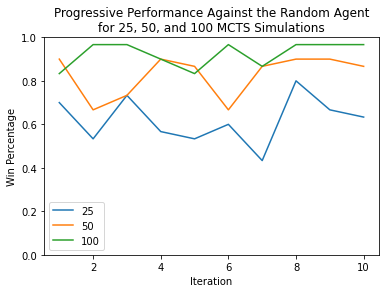

In [9]:
fig, ax = plt.subplots(1)

path_template = 'results/chkpts_mcts_sims_{}_10_iters/random_agent_eval_results_1_round_30_games.pkl'

for n_sims in [25, 50, 100]:
    results_vs_random = pickle.load(open(path_template.format(n_sims), 'rb'))

    checkpoints = range(1, 11)
    means = np.array([np.mean(x) for x in results_vs_random])
#     std_devs = np.array([np.std(x) for x in results_vs_random])

    plt.plot(checkpoints, means, label=n_sims)
#     plt.fill_between(checkpoints, means - std_devs, means + std_devs, alpha=0.2)

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Win Percentage')
plt.ylim(0, 1)
plt.title('Progressive Performance Against the Random Agent\nfor 25, 50, and 100 MCTS Simulations')
plt.savefig('outputs/hyperparam_optim_mcts_sims_plot.pdf')
plt.show()